## Using cattle breed dataset from kaggle

This Cattle Breeds Dataset consists of 5 different breeds [Ayrshire, Brown Swiss, Holstein Friesian, Jersey, Red Dane].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import requests
import zipfile
from pathlib import Path

import os
import random
from PIL import Image

from math import ceil

In [2]:
image_data_path = Path("./data/archive/Cattle Breeds")

def walk_through(image_data_path):
    image_dirs = []
    for dirpath, dirnames, filenames in os.walk(image_data_path):
        print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
        temp = Path(dirpath)
        image_dirs.append(temp)
    return image_dirs
    
image_dirs = walk_through(image_data_path)
image_dirs.pop(0)

There are 5 directories and 0 images in 'data/archive/Cattle Breeds'.
There are 0 directories and 260 images in 'data/archive/Cattle Breeds/Ayrshire cattle'.
There are 0 directories and 238 images in 'data/archive/Cattle Breeds/Brown Swiss cattle'.
There are 0 directories and 254 images in 'data/archive/Cattle Breeds/Holstein Friesian cattle'.
There are 0 directories and 252 images in 'data/archive/Cattle Breeds/Jersey cattle'.
There are 0 directories and 204 images in 'data/archive/Cattle Breeds/Red Dane cattle'.


PosixPath('data/archive/Cattle Breeds')

In [3]:
image_dirs

[PosixPath('data/archive/Cattle Breeds/Ayrshire cattle'),
 PosixPath('data/archive/Cattle Breeds/Brown Swiss cattle'),
 PosixPath('data/archive/Cattle Breeds/Holstein Friesian cattle'),
 PosixPath('data/archive/Cattle Breeds/Jersey cattle'),
 PosixPath('data/archive/Cattle Breeds/Red Dane cattle')]

In [4]:
image_dirs[0].name
list(image_dirs[0].glob("*.jpg"))

[PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle0_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle1.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle10.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle100.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle100_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle101.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle101_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle102.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle102_c.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle103.jpg'),
 PosixPath('data/archive/Cattle Breeds/Ayrshire cattle/Ayrshirecattle103_c.jpg'),
 PosixPath('data/archive/Cattle Breed

In [5]:
# len(image_dirs)

In [6]:
images , label = [] , []

for path in image_dirs:
    image_paths = list(path.glob("*.jpg"))
    for image_path in image_paths:
        images.append(Image.open(image_path))
        label.append(path.name)

In [7]:
len(images)

1208

In [8]:
random.randint(1,255)

210

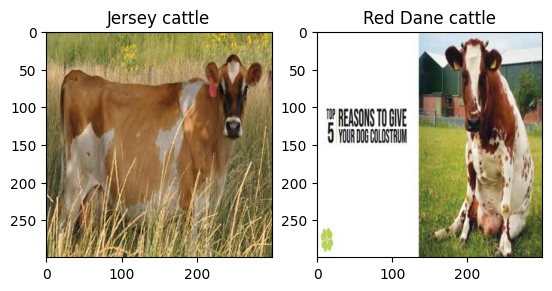

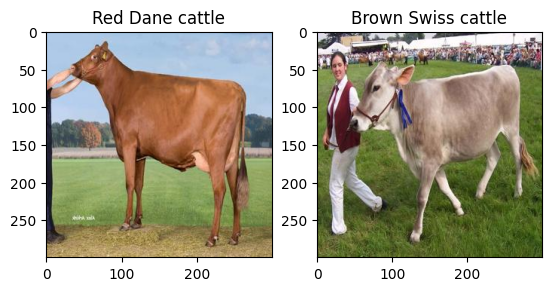

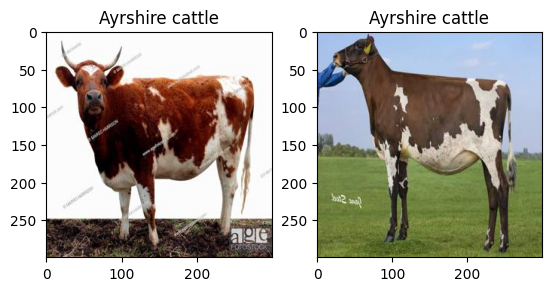

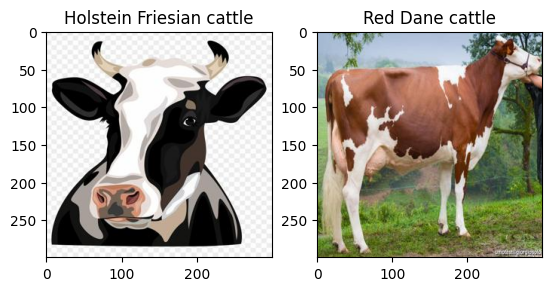

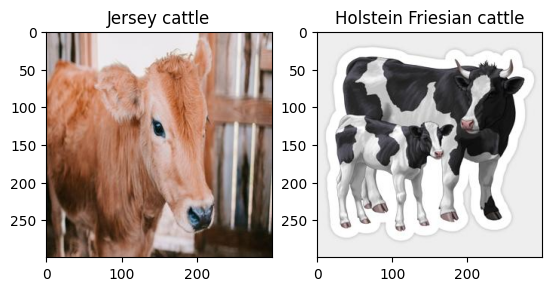

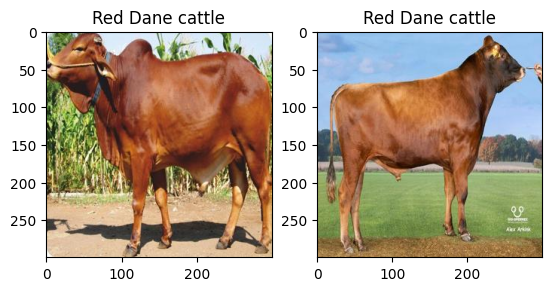

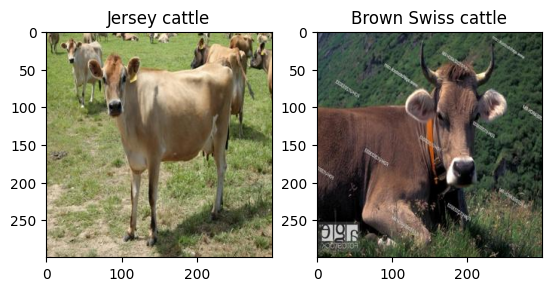

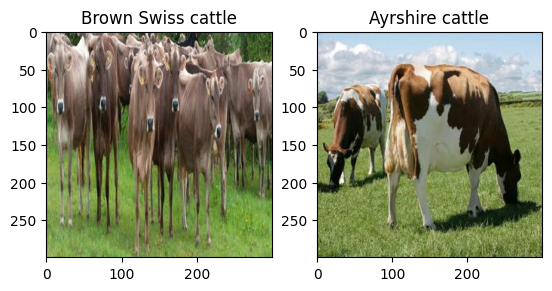

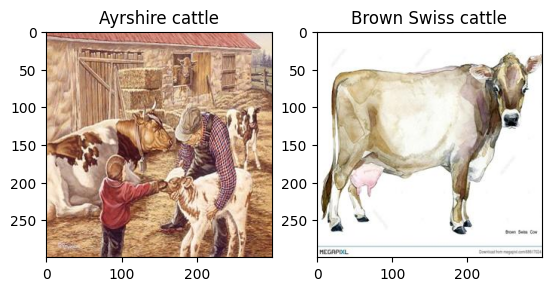

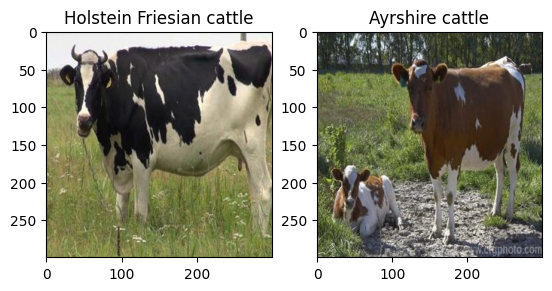

In [9]:
rows, cols = 1,2
for i in range(10):
    fig, axes = plt.subplots(rows,cols)
    a1 = int(random.randint(1,len(images)))
    a2 = int(random.randint(1,len(images)))
    axes[0].imshow(images[a1])
    axes[0].set_title(label[a1])
    axes[1].imshow(images[a2])
    axes[1].set_title(label[a2])
# plt.title(label[0])
# plt.show()

In [10]:
import torch
import torch.nn as nn
from torchvision.transforms import v2
from torch.utils.data import DataLoader
from typing import Tuple, Dict, List 
from torch.utils.data import Dataset
# from torchinfo import summary
# from torch.utils.tensorboard import SummaryWriter
from collections import OrderedDict


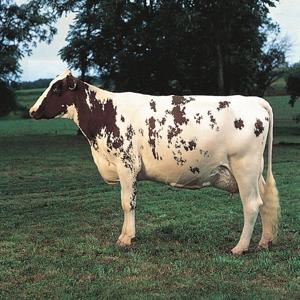

In [11]:
images[0]

In [12]:

H, W = 32, 32
# img = torch.randint(0, 256, size=(3, H, W), dtype=torch.uint8)
img = images[0]

transforms = v2.Compose([
    v2.Resize(size=(64,64)),
    v2.PILToTensor(),
])
img = transforms(img)
# plt.imshow(img[0]+img[1]+img[2])
img.shape

torch.Size([3, 64, 64])

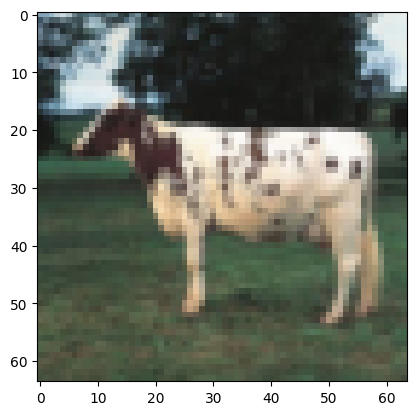

In [13]:
plt.imshow(img.permute((1,2,0)))

In [14]:

train_dataloader = DataLoader(dataset=images,
                             batch_size=1,
                             num_workers=1,
                             shuffle=True)
train_dataloader

# test_dataloader = DataLoader(dataset=test_data,
#                              batch_size=1,
#                              num_workers=1,
#                              shuffle=True)

In [15]:
def find_classes(dir: str) -> Tuple[List[str], Dict[str,int]] :
    classes = sorted([entry.name for entry in list(os.scandir(dir)) if entry.is_dir()])

    if not classes:
        print("Couldn't find any classes in target directory")
        return None
    class_idx = {class_name: i for i,class_name in enumerate(classes)}
    return classes, class_idx

In [16]:
find_classes(image_data_path)

(['Ayrshire cattle',
  'Brown Swiss cattle',
  'Holstein Friesian cattle',
  'Jersey cattle',
  'Red Dane cattle'],
 {'Ayrshire cattle': 0,
  'Brown Swiss cattle': 1,
  'Holstein Friesian cattle': 2,
  'Jersey cattle': 3,
  'Red Dane cattle': 4})

In [17]:
(image_data_path / list(os.scandir(image_data_path))[0]).glob("*.jpg")

<generator object Path.glob at 0x7f91cdeb6130>

In [18]:
class ImageFolderCustom(Dataset):
    def __init__(self, target_dir: str, transform: None):
        self.classes = []
        self.class_idx = {}
        self.paths = []
        self.p,self.q = find_classes(target_dir)
        for path in image_dirs:
            image_paths = list(path.glob("*.jpg"))
            for image_path in image_paths:
                self.paths.append(image_path)
                self.classes.append(image_path.name)
                self.class_idx[image_path.name] = self.q[path.name]
        # self.classes, self.class_idx = find_classes(target_dir)
        self.transform = transform

    def loadImage(self, index):
        img = self.paths[index]
        return Image.open(img)

    def __len__(self):
        return len(self.paths)

    def __getitem__(self, index) -> Tuple[torch.Tensor, int]:
        img = self.loadImage(index)
        class_name = self.paths[index].name
        class_idx = self.class_idx[class_name]

        if self.transform:
            return self.transform(img), class_idx
        else:
            return img, class_idx

In [19]:
data_transform = v2.Compose([
    v2.Resize(size=(128,128)),
    v2.ToTensor()
])

/home/groupe/vs_code/jupyter/env/lib/python3.11/site-packages/torchvision/transforms/v2/_deprecated.py:42: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `v2.Compose([v2.ToImage(), v2.ToDtype(torch.float32, scale=True)])`.Output is equivalent up to float precision.
  warnings.warn(


In [20]:

img_custom = ImageFolderCustom(image_data_path, transform= data_transform)
# test_img_custom = ImageFolderCustom("./temp/data/pizza_steak_sushi/test", transform= data_transform)
len(img_custom.paths)

1208

In [21]:
img_custom_dataloader = DataLoader(img_custom, batch_size=64)
img_custom_dataloader

Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


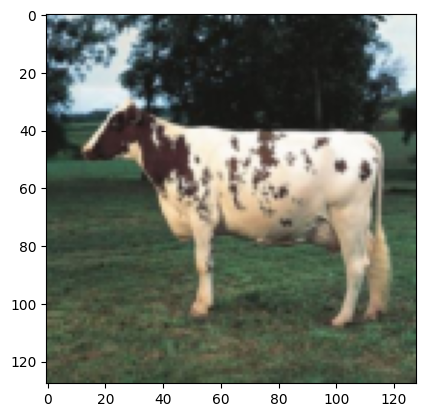

Label: 0


In [22]:
train_features, train_labels = next(iter(img_custom_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [23]:
train_size = int(0.8 * len(img_custom))
test_size = len(img_custom) - train_size
train_dataset, test_dataset = torch.utils.data.random_split(img_custom, [train_size, test_size])

In [24]:
train_size, test_size

(966, 242)

In [25]:
train_dataloader = DataLoader(train_dataset, batch_size=64)
test_dataloader = DataLoader(test_dataset, batch_size=64)

Feature batch shape: torch.Size([64, 3, 128, 128])
Labels batch shape: torch.Size([64])


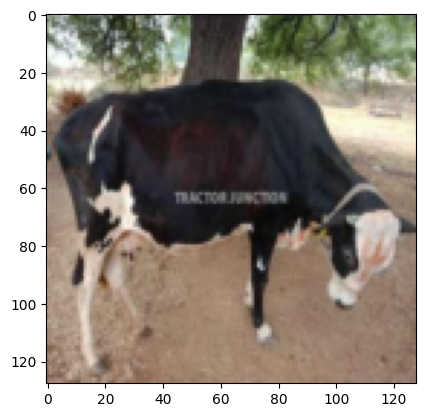

Label: 2


In [26]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")

In [27]:
img_custom.classes

['Ayrshirecattle0.jpg',
 'Ayrshirecattle0_c.jpg',
 'Ayrshirecattle1.jpg',
 'Ayrshirecattle10.jpg',
 'Ayrshirecattle100.jpg',
 'Ayrshirecattle100_c.jpg',
 'Ayrshirecattle101.jpg',
 'Ayrshirecattle101_c.jpg',
 'Ayrshirecattle102.jpg',
 'Ayrshirecattle102_c.jpg',
 'Ayrshirecattle103.jpg',
 'Ayrshirecattle103_c.jpg',
 'Ayrshirecattle104.jpg',
 'Ayrshirecattle104_c.jpg',
 'Ayrshirecattle105.jpg',
 'Ayrshirecattle105_c.jpg',
 'Ayrshirecattle106.jpg',
 'Ayrshirecattle106_c.jpg',
 'Ayrshirecattle107.jpg',
 'Ayrshirecattle107_c.jpg',
 'Ayrshirecattle109.jpg',
 'Ayrshirecattle109_c.jpg',
 'Ayrshirecattle10_c.jpg',
 'Ayrshirecattle11.jpg',
 'Ayrshirecattle111.jpg',
 'Ayrshirecattle111_c.jpg',
 'Ayrshirecattle113.jpg',
 'Ayrshirecattle113_c.jpg',
 'Ayrshirecattle116.jpg',
 'Ayrshirecattle116_c.jpg',
 'Ayrshirecattle117.jpg',
 'Ayrshirecattle117_c.jpg',
 'Ayrshirecattle118.jpg',
 'Ayrshirecattle118_c.jpg',
 'Ayrshirecattle119.jpg',
 'Ayrshirecattle119_c.jpg',
 'Ayrshirecattle11_c.jpg',
 'Ayrshireca

In [28]:
class ConvBnAct(nn.Module):
    
    def __init__(self, n_in, n_out, kernel_size = 3, stride = 1, 
                 padding = 0, groups = 1, bn = True, act = True,
                 bias = False
                ):
        
        super(ConvBnAct, self).__init__()
        
        self.conv = nn.Conv2d(n_in, n_out, kernel_size = kernel_size,
                              stride = stride, padding = padding,
                              groups = groups, bias = bias
                             )
        self.batch_norm = nn.BatchNorm2d(n_out) if bn else nn.Identity()
        self.activation = nn.SiLU() if act else nn.Identity()
        
    def forward(self, x):
        # print("ConvBnAct: ")
        # print("Shape of x: ",x.shape)
        x = self.conv(x)
        # print("Shape of x after conv: ",x.shape)
        x = self.batch_norm(x)
        x = self.activation(x)
        # print("Shape of x after batchnorm and SiLU: ",x.shape)
        
        return x
    


In [29]:
class SqueezeExcitation(nn.Module):
    
    def __init__(self, n_in, reduced_dim):
        super(SqueezeExcitation, self).__init__()
        self.n_in = n_in;
        self.reduced_dim = reduced_dim
        self.se = nn.Sequential(
            nn.AdaptiveAvgPool2d(1),
            nn.Conv2d(n_in, reduced_dim, kernel_size=1),
            nn.SiLU(),
            nn.Conv2d(reduced_dim, n_in, kernel_size=1),
            nn.Sigmoid()
        )
       
    def forward(self, x):
        # print("SqueezeExcitation: ")
        # print("Shape of x: ",x.shape)
        y = self.se(x)
        # print(f"Shape of x after adaptivepool(1) and conv2d({self.n_in},{self.reduced_dim}) + conv2d({self.reduced_dim},{self.n_in}): ",x.shape)
        
        return x * y


In [30]:
class StochasticDepth(nn.Module):
    
    def __init__(self, survival_prob = 0.8):
        super(StochasticDepth, self).__init__()
        
        self.p =  survival_prob
        
    def forward(self, x):
        # print("StocasticDepth: ")
        # print("Shape of x: ",x.shape)
        if not self.training:
            return x
        
        binary_tensor = torch.rand(x.shape[0], 1, 1, 1, device=x.device) < self.p
        y = torch.div(x, self.p) * binary_tensor
        # print("Shape of returned tensor: ",y.shape)
        
        return y
    

In [31]:
class MBConvN(nn.Module):
    
    def __init__(self, n_in, n_out, kernel_size = 3, 
                 stride = 1, expansion_factor = 6,
                 reduction = 4, # Squeeze and Excitation Block
                 survival_prob = 0.8 # Stochastic Depth
                ):
        
        super(MBConvN, self).__init__()
        
        self.skip_connection = (stride == 1 and n_in == n_out) 
        intermediate_channels = int(n_in * expansion_factor)
        padding = (kernel_size - 1)//2
        reduced_dim = int(n_in//reduction)
        
        self.expand = nn.Identity() if (expansion_factor == 1) else ConvBnAct(n_in, intermediate_channels, kernel_size = 1)
        self.depthwise_conv = ConvBnAct(intermediate_channels, intermediate_channels,
                                        kernel_size = kernel_size, stride = stride, 
                                        padding = padding, groups = intermediate_channels
                                       )
        self.se = SqueezeExcitation(intermediate_channels, reduced_dim = reduced_dim)
        self.pointwise_conv = ConvBnAct(intermediate_channels, n_out, 
                                        kernel_size = 1, act = False
                                       )
        self.drop_layers = StochasticDepth(survival_prob = survival_prob)
        
    def forward(self, x):
        # print("MBConvN: ")
        # print("Shape of x: ",x.shape)
        residual = x
        
        x = self.expand(x)
        # print("Shape of x after expansion: ",x.shape)
        x = self.depthwise_conv(x)
        # print("Shape of x after depthwise_conv: ",x.shape)
        x = self.se(x)
        # print("Shape of x after squeezeexcitation: ",x.shape)
        x = self.pointwise_conv(x)
        # print("Shape of x after pointwise_conv: ",x.shape)
        
        if self.skip_connection:
            x = self.drop_layers(x)
            # print("Shape of x after drop_layers: ",x.shape)
            x += residual
            # print("Shape of x after adding residual: ",x.shape)
        
        return x
    


In [32]:
class EfficientNet(nn.Module):
    
    def __init__(self, width_mult = 1, depth_mult = 1, 
                 dropout_rate = 0.2, num_classes = 1000):
        super(EfficientNet, self).__init__()
        
        last_channel = ceil(1280 * width_mult)
        self.features = self._feature_extractor(width_mult, depth_mult, last_channel)
        self.avgpool = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Sequential(
            nn.Dropout(dropout_rate),
            nn.Linear(last_channel, num_classes)
        )
        
    def forward(self, x):
        # print("EfficientNet: ")
        x = self.features(x)
        # print("Shape of x: ",x.shape)
        x = self.avgpool(x)
        # print("Shape of x after avgpool: ",x.shape)
        x = self.classifier(x.view(x.shape[0], -1))
        # print("Shape of x after classifies: ",x.shape)
        
        return x
    
        
    def _feature_extractor(self, width_mult, depth_mult, last_channel):
        
        channels = 4*ceil(int(32*width_mult) / 4)
        layers = [ConvBnAct(3, channels, kernel_size = 3, stride = 2, padding = 1)]
        in_channels = channels
        
        kernels = [3, 3, 5, 3, 5, 5, 3]
        expansions = [1, 6, 6, 6, 6, 6, 6]
        num_channels = [16, 24, 40, 80, 112, 192, 320]
        num_layers = [1, 2, 2, 3, 3, 4, 1]
        strides =[1, 2, 2, 2, 1, 2, 1]
        
        scaled_num_channels = [4*ceil(int(c*width_mult) / 4) for c in num_channels]
        scaled_num_layers = [int(d * depth_mult) for d in num_layers]

        
        for i in range(len(scaled_num_channels)):
             
            layers += [MBConvN(in_channels if repeat==0 else scaled_num_channels[i], 
                               scaled_num_channels[i],
                               kernel_size = kernels[i],
                               stride = strides[i] if repeat==0 else 1, 
                               expansion_factor = expansions[i]
                              )
                       for repeat in range(scaled_num_layers[i])
                      ]
            in_channels = scaled_num_channels[i]
        
        layers.append(ConvBnAct(in_channels, last_channel, kernel_size = 1, stride = 1, padding = 0))
    
        return nn.Sequential(*layers)

In [37]:
efficient_net_config = {
    # tuple of width multiplier, depth multiplier, resolution, and Survival Prob
    "b_1": (1.0,1.0,128,0.2),
    "b0" : (1.0, 1.0, 224, 0.2),
    "b1" : (1.0, 1.1, 240, 0.2),
    "b2" : (1.1, 1.2, 260, 0.3),
    "b3" : (1.2, 1.4, 300, 0.3),
    "b4" : (1.4, 1.8, 380, 0.4),
    "b5" : (1.6, 2.2, 456, 0.4),
    "b6" : (1.8, 2.6, 528, 0.5),
    "b7" : (2.0, 3.1, 600, 0.5)
}

In [38]:
num_classes = len(img_custom.p)
num_epochs = 1
batch_size = 16
learning_rate = 0.005

# model = EfficientNet(num_classes=num_classes)
width_mult, depth_mult, res, dropout_rate = efficient_net_config["b_1"]
model = EfficientNet(width_mult, depth_mult, dropout_rate)

# Loss and optimizer
# criterion = nn.CrossEntropyLoss()
# optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate, weight_decay = 0.005, momentum = 0.9)  


# Train the model
total_step = len(train_dataloader)

In [39]:
from torchview import draw_graph

# model = testInceptionBlock()

architecture = 'Efficientnet'
model_graph = draw_graph(model, input_size=(64,3,128,128), graph_dir ='TB' , roll=True, expand_nested=True, graph_name=f'self_{architecture}',save_graph=False,filename=f'self_{architecture}')
# model_graph.visual_graph

EfficientNet: 
ConvBnAct: 
Shape of x:  torch.Size([64, 3, 224, 224])
Shape of x after conv:  torch.Size([64, 32, 112, 112])
Shape of x after batchnorm and SiLU:  torch.Size([64, 32, 112, 112])
MBConvN: 
Shape of x:  torch.Size([64, 32, 112, 112])
Shape of x after expansion:  torch.Size([64, 32, 112, 112])
ConvBnAct: 
Shape of x:  torch.Size([64, 32, 112, 112])
Shape of x after conv:  torch.Size([64, 32, 112, 112])
Shape of x after batchnorm and SiLU:  torch.Size([64, 32, 112, 112])
Shape of x after depthwise_conv:  torch.Size([64, 32, 112, 112])
SqueezeExcitation: 
Shape of x:  torch.Size([64, 32, 112, 112])
Shape of x after adaptivepool(1) and conv2d(32,8) + conv2d(8,32):  torch.Size([64, 32, 112, 112])
Shape of x after squeezeexcitation:  torch.Size([64, 32, 112, 112])
ConvBnAct: 
Shape of x:  torch.Size([64, 32, 112, 112])
Shape of x after conv:  torch.Size([64, 16, 112, 112])
Shape of x after batchnorm and SiLU:  torch.Size([64, 16, 112, 112])
Shape of x after pointwise_conv:  tor

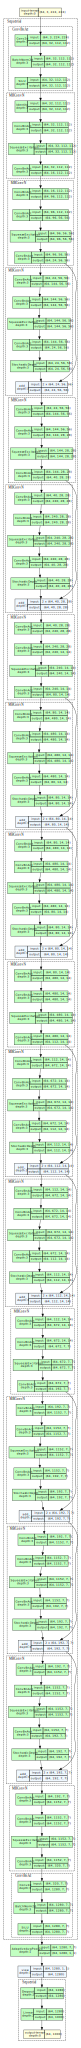

In [45]:
from torchview import draw_graph

# model = testInceptionBlock()

architecture = 'MyModel'
model_graph = draw_graph(model, input_size=(64,3,128,128), graph_dir ='TB' , roll=True, expand_nested=True, graph_name=f'self_{architecture}',save_graph=False,filename=f'self_{architecture}')
model_graph.visual_graph

In [36]:
total_step

16

In [40]:
from tqdm.auto import tqdm
from timeit import default_timer as timer

In [41]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(
    params = model.parameters(),
    lr = 0.1
)

In [ ]:
torch.manual_seed(42)
train_start_time = timer()

epochs = 1

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n")
    train_loss = 0
    
    for batch, (X,y) in enumerate(train_dataloader):
        print(batch,X.shape,y.shape)
        model.train()

        y_pred = model(X)
        loss = loss_fn(y_pred, y)
        train_loss += loss

        optimizer.zero_grad()

        loss.backward()

        optimizer.step()
        
        del X,y
        
        # if batch == 8:
        #     break

#         if batch % 10 == 0:
#             print(f"Batches {batch*len(X)}/{len(train_dataloader.dataset)} samples finished.")

    train_loss /= len(train_dataloader)

    test_loss, test_acc = 0,0

    model.eval()

    with torch.inference_mode():
        for X_test, y_test in test_dataloader:
            test_pred = model(X_test)
            test_loss += loss_fn(test_pred, y_test)
            # test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1))

        test_loss /= len(test_dataloader)
        # test_acc /= len(test_dataloader)

    print(f"\nTrain Loss: {train_loss:.4f} Test loss: {test_loss:.4f}")


train_end_time = timer()

print(f"Total time = {train_end_time - train_start_time}")

  0%|          | 0/1 [00:00<?, ?it/s]

Epoch: 0

0 torch.Size([64, 3, 128, 128]) torch.Size([64])
1 torch.Size([64, 3, 128, 128]) torch.Size([64])
2 torch.Size([64, 3, 128, 128]) torch.Size([64])
3 torch.Size([64, 3, 128, 128]) torch.Size([64])
4 torch.Size([64, 3, 128, 128]) torch.Size([64])


In [48]:
with torch.no_grad():
    correct = 0
    total = 0
    for images, labels in test_dataloader:
#         images = images.to(device)
#         labels = labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
        del images, labels, outputs
        print(correct,total)

    print('Accuracy of the network on the {} test images: {} %'.format(10000, 100 * correct / total))   

14 64
27 128
45 192
60 242
Accuracy of the network on the 10000 test images: 24.793388429752067 %


In [44]:
train_features[0].shape

torch.Size([3, 128, 128])

Predicted:  Holstein Friesian cattle 
Actual:  Brown Swiss cattle


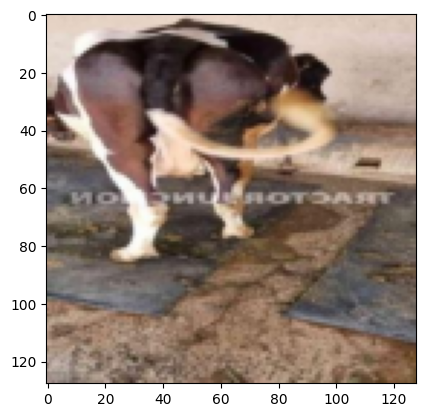

Label: 1


In [70]:
train_features, train_labels = next(iter(train_dataloader))
# print(f"Feature batch shape: {train_features.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
# print(f"Labels batch shape: {train_labels.size()}")
img = train_features[2].squeeze()
label = train_labels[2]
_,label_pred = torch.max(model(train_features[0].unsqueeze(dim=0)),1)
print("Predicted: ",img_custom.p[label_pred],"\nActual: ",img_custom.p[label])
plt.imshow(img.permute(1,2,0), cmap="gray")
plt.show()
print(f"Label: {label}")